In [2]:
myboxplot <- function(eset, title){
    options(repr.plot.width = 10, repr.plot.height = 4)
    title <- paste0(title, '/', annotation(eset))
    boxplot(exprs(eset), boxwex = 0.6, notch = T, main = title, outline = FALSE, las =2)
}

myhist <- function(eset, title = "Histogram", xlabel = "RMAlog2"){
    i = 1
    plot(density((exprs(eset)[,i]), na.rm = T), main = title, xlab = xlabel)
    for(i in 2:dim(exprs(eset))[2]){
        lines(density((exprs(eset)[,i]), na.rm = T),)
    }
}

getSnames <- function(sname, ext =".CEL.gz"){
    sname <- sub(ext, "", sname)
    sname <- unlist(sname)[1]
    return(sname)
}

In [3]:
library(biomaRt)

Warning message:
"package 'biomaRt' was built under R version 4.1.2"


In [4]:
listEnsembl()

biomart       version               
1 genes         Ensembl Genes 110     
2 mouse_strains Mouse strains 110     
3 snps          Ensembl Variation 110 
4 regulation    Ensembl Regulation 110

In [5]:
library(GEOquery)

Warning message:
"package 'GEOquery' was built under R version 4.1.2"


Loading required package: Biobase

Warning message:
"package 'Biobase' was built under R version 4.1.1"
Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.1.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting o

In [6]:
gse <- getGEO(
    GEO = "GSE48350"
)

Found 1 file(s)

GSE48350_series_matrix.txt.gz



In [7]:
pData(gse[[1]])

title                                     geo_accession
GSM300166  PostcentralGyrus_female_91yrs_indiv10     GSM300166    
GSM300167  SuperiorFrontalGyrus_female_91yrs_indiv10 GSM300167    
GSM300168  Hippocampus_female_96yrs_indiv105         GSM300168    
GSM300169  Hippocampus_male_82yrs_indiv106           GSM300169    
GSM300170  Hippocampus_male_84yrs_indiv108           GSM300170    
GSM300171  Hippocampus_female_87yrs_indiv109         GSM300171    
GSM300172  Hippocampus_female_82yrs_indiv111         GSM300172    
GSM300173  EntorhinalCortex_male_45yrs_indiv12       GSM300173    
GSM300174  Hippocampus_male_45yrs_indiv12            GSM300174    
GSM300175  PostcentralGyrus_male_45yrs_indiv12       GSM300175    
GSM300176  SuperiorFrontalGyrus_male_45yrs_indiv12   GSM300176    
GSM300177  EntorhinalCortex_male_95yrs_indiv14       GSM300177    
GSM300178  Hippocampus_male_95yrs_indiv14            GSM300178    
GSM300179  PostcentralGyrus_male_95yrs_indiv14       GSM300179    
GSM300180  SuperiorFrontalGyrus_male_95yrs_indiv14   GSM300180    
GSM300181  EntorhinalCortex_male_80yrs_indiv15       GSM300181    
GSM300182  Hippocampus_male_80yrs_indiv15            GSM300182    
GSM300183  PostcentralGyrus_male_80yrs_indiv15       GSM300183    
GSM300185  Hippocampus_male_91yrs_indiv16-07         GSM300185    
GSM300186  EntorhinalCortex_female_45yrs_indiv17     GSM300186    
GSM300187  Hippocampus_female_45yrs_indiv17          GSM300187    
GSM300188  SuperiorFrontalGyrus_female_45yrs_indiv17 GSM300188    
GSM300189  EntorhinalCortex_female_74yrs_indiv18     GSM300189    
GSM300190  Hippocampus_female_74yrs_indiv18          GSM300190    
GSM300191  SuperiorFrontalGyrus_female_74yrs_indiv18 GSM300191    
GSM300192  EntorhinalCortex_female_99yrs_indiv2      GSM300192    
GSM300193  Hippocampus_female_99yrs_indiv2           GSM300193    
GSM300194  PostcentralGyrus_female_99yrs_indiv2      GSM300194    
GSM300195  SuperiorFrontalGyrus_female_99yrs_indiv2  GSM300195    
GSM300196  EntorhinalCortex_female_74yrs_indiv21     GSM300196    
...        ...                                       ...          
GSM1176246 post-central gyrus_male_76_AD_69          GSM1176246   
GSM1176247 post-central gyrus_male_79_AD_7           GSM1176247   
GSM1176248 post-central gyrus_male_85_AD_51          GSM1176248   
GSM1176249 post-central gyrus_male_85_AD_74          GSM1176249   
GSM1176250 post-central gyrus_male_86_AD_92          GSM1176250   
GSM1176251 post-central gyrus_male_87_AD_19          GSM1176251   
GSM1176252 post-central gyrus_male_94_AD_44          GSM1176252   
GSM1176253 post-central gyrus_male_94_AD_5           GSM1176253   
GSM1176254 post-central gyrus_male_94_AD_90          GSM1176254   
GSM1176255 superior frontal gyrus_female_74_AD_37    GSM1176255   
GSM1176256 superior frontal gyrus_female_76_AD_48    GSM1176256   
GSM1176257 superior frontal gyrus_female_86_AD_15    GSM1176257   
GSM1176258 superior frontal gyrus_female_82_AD_9     GSM1176258   
GSM1176259 superior frontal gyrus_female_85_AD_24    GSM1176259   
GSM1176260 superior frontal gyrus_female_85_AD_57    GSM1176260   
GSM1176261 superior frontal gyrus_female_88_AD_91    GSM1176261   
GSM1176262 superior frontal gyrus_female_90_AD_23    GSM1176262   
GSM1176263 superior frontal gyrus_female_90_AD_36    GSM1176263   
GSM1176264 superior frontal gyrus_female_90_AD_6     GSM1176264   
GSM1176265 superior frontal gyrus_female_90_AD_75    GSM1176265   
GSM1176266 superior frontal gyrus_female_91_AD_11    GSM1176266   
GSM1176267 superior frontal gyrus_female_94_AD_70    GSM1176267   
GSM1176268 superior frontal gyrus_female_95_AD_64    GSM1176268   
GSM1176269 superior frontal gyrus_male_76_AD_33      GSM1176269   
GSM1176270 superior frontal gyrus_male_85_AD_51      GSM1176270   
GSM1176271 superior frontal gyrus_male_85_AD_74      GSM1176271   
GSM1176272 superior frontal gyrus_male_86_AD_92      GSM1176272   
GSM1176273 superior frontal gyrus_male_94_AD_44      GSM11

In [8]:
#samples annotation
write.table(pData(gse[[1]]), file = paste0("AD-GSE48350.pData.tsv"), sep = "\t")

In [9]:
#reading raw data
raw_data_dir <- paste0("GSE48350_RAW")
fnames <- list.files(raw_data_dir, pattern = ".gz")
snames <- unlist(lapply(fnames, getSnames, ext = ".CEL.gz"))
snames <- sapply(strsplit(snames,"_"), '[', 1)
snames

[1] "GSM1176255" "GSM1176256" "GSM1176257" "GSM1176258" "GSM1176259"
 [6] "GSM1176260" "GSM1176261" "GSM1176262" "GSM1176263" "GSM1176264"
[11] "GSM1176265" "GSM1176266" "GSM1176267" "GSM1176268" "GSM1176269"
[16] "GSM1176270" "GSM1176271" "GSM1176272" "GSM1176273" "GSM1176274"
[21] "GSM1176275"

In [10]:
library(affy)
library(affyio)

Warning message:
"package 'affy' was built under R version 4.1.1"
Warning message:
"package 'affyio' was built under R version 4.1.1"


In [11]:
eset_rma <- justRMA(filenames = fnames, celfile.path = raw_data_dir, sampleNames = snames)
eset_rma

Warning message:
"replacing previous import 'AnnotationDbi::tail' by 'utils::tail' when loading 'hgu133plus2cdf'"
Warning message:
"replacing previous import 'AnnotationDbi::head' by 'utils::head' when loading 'hgu133plus2cdf'"




ExpressionSet (storageMode: lockedEnvironment)
assayData: 54675 features, 21 samples 
  element names: exprs, se.exprs 
protocolData
  sampleNames: GSM1176255 GSM1176256 ... GSM1176275 (21 total)
  varLabels: ScanDate
  varMetadata: labelDescription
phenoData
  sampleNames: GSM1176255 GSM1176256 ... GSM1176275 (21 total)
  varLabels: sample
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu133plus2 

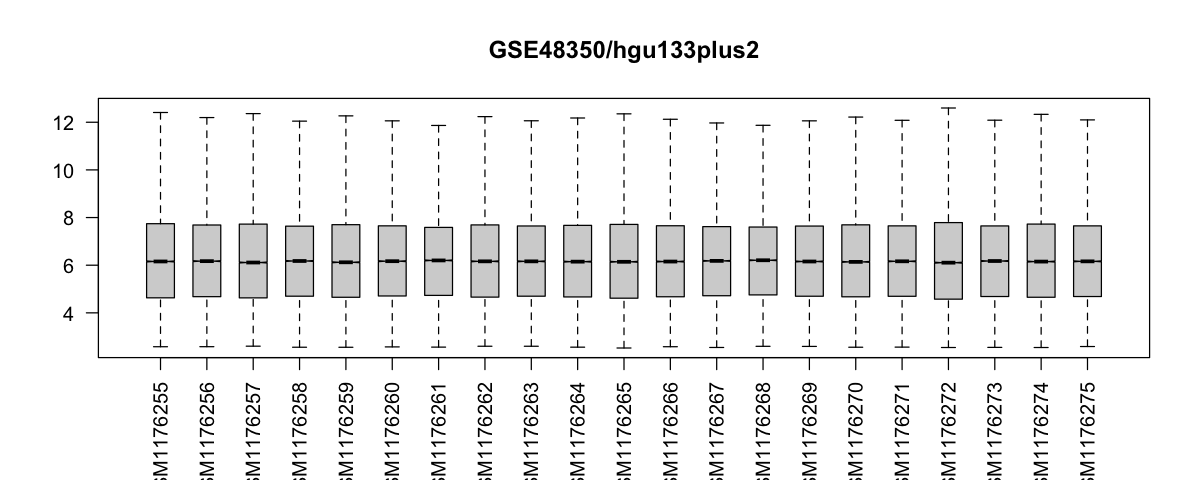

In [12]:
myboxplot(eset_rma, "GSE48350")

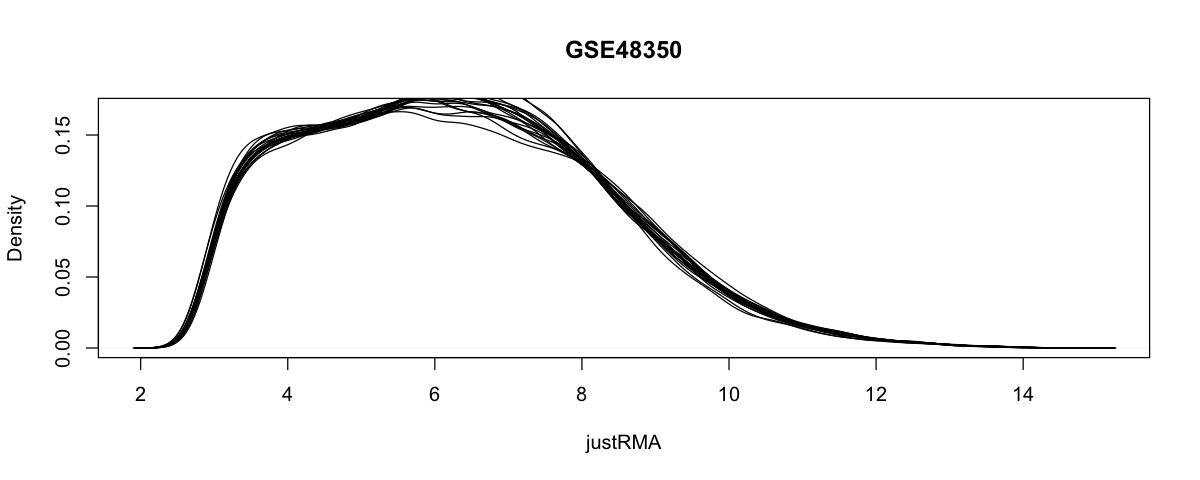

In [13]:
myhist(eset_rma, title = "GSE48350", xlabel = "justRMA")

In [44]:
log2_exprs <- exprs(eset_rma)
#head(log2_exprs, 20)
log2_exprs

GSM1176255 GSM1176256 GSM1176257 GSM1176258 GSM1176259
1007_s_at             11.715161  11.273620  10.508958  10.930439  10.555628 
1053_at                6.318927   6.332438   6.351773   6.248771   6.573906 
117_at                 6.237154   5.873304   5.540912   5.938872   5.695414 
121_at                 8.037731   8.055693   7.657945   8.324510   7.929910 
1255_g_at              3.819819   3.945889   3.868008   3.988359   3.737851 
1294_at                7.369075   7.193545   6.992804   6.923932   6.750610 
1316_at                6.601119   6.586982   6.825374   7.203972   6.899376 
1320_at                6.150733   5.606746   5.091461   5.504215   5.424244 
1405_i_at              3.782331   3.728325   3.571723   3.184415   3.557341 
1431_at                4.847049   5.469413   5.798242   5.151788   5.640904 
1438_at                6.774806   6.686807   6.604931   6.587042   6.511757 
1487_at                7.706115   7.828210   7.819315   7.912187   8.081897 
1494_f_at              6.390373   6.577887   6.288943   6.478263   6.585678 
1552256_a_at           9.362331   8.718513   8.591590   8.592559   8.329391 
1552257_a_at           8.697499   8.414870   8.847506   8.196645   8.568110 
1552258_at             4.313353   4.327252   4.398854   4.482609   4.495425 
1552261_at             5.797263   5.831505   6.022026   5.894776   5.894776 
1552263_at             5.675409   5.146800   5.058240   5.103935   4.654277 
1552264_a_at           8.324661   8.340505   6.973281   7.972402   8.366196 
1552266_at             3.820735   3.955640   3.977324   3.929908   4.143071 
1552269_at             3.919705   3.734443   3.657639   3.721431   3.817650 
1552271_at             6.110168   6.334092   6.402241   6.145285   6.181203 
1552272_a_at           5.892740   6.296684   6.399330   5.895347   6.084049 
1552274_at             8.750927   9.062672   8.645766   8.964666   8.698250 
1552275_s_at           8.785358   9.611767   8.689897   9.176437   8.891458 
1552276_a_at           6.254009   6.044629   5.795907   6.044629   6.056319 
1552277_a_at           7.594721   7.589296   7.464715   7.308178   7.855467 
1552278_a_at           5.697786   5.590875   5.621722   5.650539   5.429471 
1552279_a_at           8.121292   7.895979   7.595977   7.793645   7.673699 
1552280_at             3.779434   3.989585   4.023921   4.107412   4.168360 
...                   ...        ...        ...        ...        ...       
AFFX-PheX-5_at         7.753865   5.087429   5.177416   4.917430   4.953915 
AFFX-PheX-M_at         8.611980   6.075300   6.330502   5.523431   6.010015 
AFFX-ThrX-3_at        10.582326   8.081044   8.899869   7.596045   8.466992 
AFFX-ThrX-5_at         8.268824   5.748661   5.830651   5.385794   5.596389 
AFFX-ThrX-M_at         9.175363   6.531044   6.944570   6.162669   6.428577 
AFFX-TrpnX-3_at        2.971427   2.936306   3.084930   3.098125   2.847959 
AFFX-TrpnX-5_at        3.793256   3.738941   3.884290   3.831968   3.753779 
AFFX-TrpnX-M_at        3.586808   3.699143   3.797787   3.921248   3.676281 
AFFX-hum_alu_at       14.566045  14.618384  14.546660  14.625548  14.513824 
AFFX-r2-Bs-dap-3_at   11.410977   9.448124   9.983545   9.205226   9.595558 
AFFX-r2-Bs-dap-5_at    9.976872   7.267021   7.145449   6.898534   6.561842 
AFFX-r2-Bs-dap-M_at   10.871564   8.451830   8.732436   8.255073   8.588369 
AFFX-r2-Bs-lys-3_at    8.008636   5.622182   6.404322   5.112151   6.003597 
AFFX-r2-Bs-lys-5_at    8.075753   4.903934   5.235062   4.282676   5.229519 
AFFX-r2-Bs-lys-M_at    8.066866   5.180663   6.175080   5.438911   5.877276 
AFFX-r2-Bs-phe-3_at    9.510853   7.266315   7.841255   6.693504   7.693326 
AFFX-r2-Bs-phe-5_at    8.514929   5.343768   5.888240   5.198029   5.466486 
AFFX-r2-Bs-phe-M_at    8.869874   6.290796   6.735115   6.086613   6.272251 
AFFX-r2-Bs-thr-3_s_at 10.939619   8.346147   9.232065   7.982263   8.945963 
AFFX-r2-Bs-thr-5_s_at  9.181312   6.525439   6.663722   6.134065   5.979761 
AFFX-r2-Bs-thr-M_s

In [15]:
mart <- useEnsembl(biomart = "ensembl", dataset = "hsapiens_gene_ensembl")

In [16]:
mart

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the hsapiens_gene_ensembl dataset

In [17]:
annotation(gse[[1]])
platform <- "affy_hg_u133_plus_2"
mapped_id <- getBM(attributes = c(platform, "hgnc_symbol", "entrezgene_id", "ensembl_gene_id"),
            filters = platform,
            values = rownames(log2_exprs),
            mart = mart
)

[1] "GPL570"

In [18]:
mapped_id

affy_hg_u133_plus_2 hgnc_symbol entrezgene_id ensembl_gene_id
1     1553551_s_at        MT-ND1           4535     ENSG00000198888
2     1553551_s_at        MT-TI              NA     ENSG00000210100
3     1553551_s_at        MT-TM              NA     ENSG00000210112
4     1553551_s_at        MT-ND2           4536     ENSG00000198763
5     1553538_s_at        MT-CO1           4512     ENSG00000198804
6     1553570_x_at        MT-CO1           4512     ENSG00000198804
7     1553569_at          MT-CO1           4512     ENSG00000198804
8     1553570_x_at        MT-TD              NA     ENSG00000210154
9     1553567_s_at        MT-TD              NA     ENSG00000210154
10    1553569_at          MT-TD              NA     ENSG00000210154
11    1553570_x_at        MT-CO2           4513     ENSG00000198712
12    1553567_s_at        MT-CO2           4513     ENSG00000198712
13    1553569_at          MT-CO2           4513     ENSG00000198712
14    1553567_s_at        MT-TK              NA     ENSG00000210156
15    1553567_s_at        MT-ATP8          4509     ENSG00000228253
16    1553588_at          MT-ATP6          4508     ENSG00000198899
17    1553567_s_at        MT-ATP6          4508     ENSG00000198899
18    1553588_at          MT-CO3           4514     ENSG00000198938
19    1553588_at          MT-TG              NA     ENSG00000210164
20    1553588_at          MT-ND3           4537     ENSG00000198840
21    1553588_at          MT-TR              NA     ENSG00000210174
22    1553588_at          MT-ND4L          4539     ENSG00000212907
23    1555653_at          MT-ND5           4540     ENSG00000198786
24    1553575_at          MT-ND6           4541     ENSG00000198695
25    1553575_at          MT-TE              NA     ENSG00000210194
26    1553474_at                      100288966     ENSG00000277630
27    1555865_at          TOLLIP-DT      255512     ENSG00000291427
28    1553633_s_at        SLC9B1P1           NA     ENSG00000183704
29    1552690_a_at        CACNA2D4        93589     ENSG00000284953
30    1558530_at          LRTM2          654429     ENSG00000285383
...   ...                 ...         ...           ...            
55690 37005_at            NBL1        100532736     ENSG00000158747
55691 240634_x_at                         84809     ENSG00000291072
55692 244848_at                              NA     ENSG00000237188
55693 244472_at           TRABD2B        388630     ENSG00000269113
55694 241707_at           TRABD2B        388630     ENSG00000269113
55695 242086_at           SPATA6          54558     ENSG00000132122
55696 37892_at            COL11A1          1301     ENSG00000060718
55697 242882_at           RNF207         388591     ENSG00000158286
55698 64942_at            GPR153         387509     ENSG00000158292
55699 244489_at           THBS3-AS1   105371450     ENSG00000231064
55700 242327_x_at         ESPN            83715     ENSG00000187017
55701 242410_s_at         CACNA1E           777     ENSG00000198216
55702 243707_at           PRKACB-DT          NA     ENSG00000271576
55703 241290_at                              NA     ENSG00000225605
55704 39650_s_at          PCNX2           80003     ENSG00000135749
55705 241450_at           RSPO1          284654     ENSG00000169218
55706 243717_at           EPHA10         284656     ENSG00000183317
55707 242381_x_at                            NA     ENSG00000227994
55708 243623_at           SLC1A7           6512     ENSG00000162383
55709 240692_at                              NA     ENSG00000223920
55710 241853_at           RTCA-AS1           NA     ENSG00000224616
55711 241456_at           FAM78B         149297     ENSG00000188859
55712 241544_at           FAM78B         149297     ENSG00000188859
55713 243873_at           TMCC2-AS1          NA     ENSG00000225063
55714 244080_at                              NA     ENSG00000260805
55715 244555_at                              NA     ENSG00000288999
55716 241753_at                       105373170     ENSG000002

In [19]:
#remove duplicates
unique_probes <- mapped_id[!(duplicated(mapped_id[,platform]) | duplicated(mapped_id[,platform], fromLast = TRUE)), ]
rownames(unique_probes) <- unique_probes$affy_hg_u133_plus2
write.table(unique_probes, paste0("AD_GSE48350_", annotation(gse[[1]]),"probe_mapping.tsv"), sep = "\t", row.names = F)

In [30]:
mapped_id[,platform]

[1] "1553551_s_at"                "1553551_s_at"               
    [3] "1553551_s_at"                "1553551_s_at"               
    [5] "1553538_s_at"                "1553570_x_at"               
    [7] "1553569_at"                  "1553570_x_at"               
    [9] "1553567_s_at"                "1553569_at"                 
   [11] "1553570_x_at"                "1553567_s_at"               
   [13] "1553569_at"                  "1553567_s_at"               
   [15] "1553567_s_at"                "1553588_at"                 
   [17] "1553567_s_at"                "1553588_at"                 
   [19] "1553588_at"                  "1553588_at"                 
   [21] "1553588_at"                  "1553588_at"                 
   [23] "1555653_at"                  "1553575_at"                 
   [25] "1553575_at"                  "1553474_at"                 
   [27] "1555865_at"                  "1553633_s_at"               
   [29] "1552690_a_at"                "1558530_at"                 
   [31] "1556677_at"                  "1558938_at"                 
   [33] "1558938_at"                  "1554125_a_at"               
   [35] "1555444_a_at"                "1555743_s_at"               
   [37] "1555390_at"                  "1552952_at"                 
   [39] "1559133_at"                  "1559134_a_at"               
   [41] "1552872_at"                  "1554821_a_at"               
   [43] "1556445_at"                  "1557480_a_at"               
   [45] "1559566_at"                  "1556195_a_at"               
   [47] "1554385_a_at"                "1554384_at"                 
   [49] "1552841_s_at"                "1555399_a_at"               
   [51] "1555846_a_at"                "1559075_s_at"               
   [53] "1559049_a_at"                "1559048_at"                 
   [55] "1555336_a_at"                "1555335_at"                 
   [57] "1556794_at"                  "1553633_s_at"               
   [59] "1559471_s_at"                "1559470_at"                 
   [61] "1555716_a_at"                "1553044_at"                 
   [63] "1556794_at"                  "1554983_at"                 
   [65] "1552466_x_at"                "1554405_a_at"               
   [67] "1557470_at"                  "1555188_at"                 
   [69] "1554787_at"                  "1556414_at"                 
   [71] "1553608_a_at"                "1553607_at"                 
   [73] "1553313_s_at"                "1559603_at"                 
   [75] "1554428_s_at"                "1555778_a_at"               
   [77] "1553340_s_at"                "1556911_at"                 
   [79] "1555373_at"                  "1556794_at"                 
   [81] "1552576_at"                  "1552576_at"                 
   [83] "1555935_s_at"                "1552605_s_at"               
   [85] "1552604_at"                  "1555125_at"                 
   [87] "1555994_at"                  "1555995_a_at"               
   [89] "1552468_a_at"                "1552467_at"                 
   [91] "1557279_at"                  "1557280_s_at"               
   [93] "1557717_at"                  "1554921_a_at"               
   [95] "1554920_at"                  "1557918_s_at"               
   [97] "1553846_at"                  "1553847_a_at"               
   [99] "1557470_at"                  "1554886_a_at"               
  [101] "1556888_at"                  "1556889_s_at"               
  [103] "1553822_at"                  "1553823_a_at"               
  [105] "1553519_at"                  "1553608_a_at"               
  [107] "1552401_a_at"                "1553608_a_at"               
  [109] "1552401_a_at"                "1552816_at"                 
  [111] "1556301_at"                  "1554767_s_at"               
  [113] "1552347_at"                  "1553619_a_at"               
  [115] "1553618_at"                  "1556183_at"                 
  [117] "1554741_s_at"                "1558636_s_at"        

In [20]:
library(WGCNA)

Warning message:
"package 'WGCNA' was built under R version 4.1.2"


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: 'fastcluster'


The following object is masked from 'package:stats':

    hclust





Attaching package: 'WGCNA'


The following object is masked from 'package:stats':

    cor




In [50]:
#keep rows with maxRowVariance per ENSG
CR <- WGCNA::collapseRows(log2_exprs[(unique_probes$affy_hg_u133_plus),], 
rowGroup = unique_probes$hgnc_symbol, 
rowID = unique_probes[,platform], method = "maxRowVariance")

Warning message in WGCNA::collapseRows(log2_exprs[(unique_probes$affy_hg_u133_plus), :
"rowGroup contains blanks. It is strongly recommended that you remove these rows before calling the function.
    But for your convenience, the collapseRow function will remove these rows"
Warning message in WGCNA::collapseRows(log2_exprs[(unique_probes$affy_hg_u133_plus), :
"The argument rowGroup contains missing data. It is strongly recommended
    that you remove these rows before calling the function. Or redefine rowGroup
    so that it has no missing data. But for convenience, we remove these data."


In [51]:
dim(CR$datETcollapsed)

[1] 18166    21

In [53]:
CR$datETcollapsed

GSM1176255 GSM1176256 GSM1176257 GSM1176258 GSM1176259 GSM1176260
A1BG-AS1     5.352710   5.310486   5.665272   5.630609   5.264279   6.131864 
A1CF         4.795585   4.807935   4.929803   4.713392   5.045673   5.218089 
A2M         11.479278  10.497342   9.785809   9.171326   9.980392  10.758403 
A2M-AS1      6.935550   6.793257   7.156812   6.634913   6.363635   6.791488 
A2ML1        6.208239   5.584823   5.505287   5.965894   5.096385   5.532229 
A4GALT       7.229002   7.180768   7.513902   7.566443   7.054660   7.864845 
A4GNT        5.035228   4.785097   4.952519   5.218072   4.968186   4.821987 
AACS         8.201470   8.980021   9.070221   8.918858   9.142708   8.984893 
AACSP1       3.548233   4.331883   4.102467   3.833781   3.879744   3.755773 
AADAC        4.867412   4.970419   5.128967   5.066386   5.069592   5.092934 
AADAT        6.872976   7.440623   7.586675   6.965607   7.262888   7.111646 
AAGAB        7.130276   7.078394   7.025149   6.891299   6.964322   6.782035 
AAK1         6.878053   8.110100   8.808601   7.885628   8.843792   7.603272 
AAMDC        7.797431   6.869771   7.272886   7.200384   7.180039   7.386617 
AAMP         8.784029   8.542925   8.788936   8.475695   8.815060   8.466660 
AANAT        3.863903   4.346829   4.133816   3.959366   4.065144   4.288956 
AAR2         7.972548   7.794187   7.987219   7.949047   7.736807   7.838738 
AARS1       10.479690  10.432092  10.417579  10.322909  10.729068  10.545232 
AARS2        7.626195   7.878897   7.976353   7.697946   7.689406   7.845849 
AASDH        8.310263   8.108231   8.250010   8.406444   7.933456   7.352683 
AASDHPPT     8.124437   8.851917   8.552943   8.973230   9.231009   8.216023 
AASS         7.245229   7.025075   6.572515   6.681910   6.480812   6.084467 
AATBC        4.268163   4.204853   4.194662   4.123555   3.917634   4.247628 
AATK         7.182520   6.809297   6.841369   5.735864   6.023089   6.826324 
ABAT         9.011646   8.346857   6.910624   8.120092   7.649525   6.673519 
ABCA1        8.660904   6.962448   7.219826   6.753696   6.759389   6.234833 
ABCA12       3.312110   3.045365   3.172266   3.171774   3.024929   3.025347 
ABCA13       2.980436   2.920541   2.830552   2.861145   2.868411   3.212728 
ABCA17P      6.296941   6.249987   7.076512   6.102720   6.467738   6.167985 
ABCA2        9.720611   9.685208   9.263451   9.546373   9.426914  10.039233 
...         ...        ...        ...        ...        ...        ...       
ZSCAN23     3.199741    3.199741  3.121723   3.227038   3.194199   3.251840  
ZSCAN25     6.250361    6.435434  6.376971   6.315956   6.616638   6.454525  
ZSCAN26     7.940282    7.475320  7.749370   6.991254   7.378298   6.572838  
ZSCAN29     7.479940    6.935852  7.319632   7.231962   7.321726   7.710988  
ZSCAN30     7.600206    7.344207  7.535697   7.326033   7.228941   6.826324  
ZSCAN31     6.847958    7.070561  6.964819   7.783712   7.167121   7.067735  
ZSCAN32     7.846250    7.909501  7.746586   7.644244   7.666471   7.847087  
ZSCAN4      3.402861    3.622573  3.648335   3.371048   3.490364   3.381511  
ZSCAN5A     6.083614    5.932631  6.263221   6.158142   6.538515   6.456285  
ZSCAN5A-AS1 3.909486    3.698342  3.896219   4.088790   3.980744   3.948434  
ZSCAN9      5.525605    5.583303  5.195300   5.439449   5.257319   5.218523  
ZSWIM1      7.949111    7.742150  7.899407   7.817575   7.907426   7.818025  
ZSWIM2      2.967328    3.124250  3.151328   3.109947   3.218620   3.275645  
ZSWIM3      6.742269    7.024032  6.899933   7.020320   7.097199   6.788293  
ZSWIM5      7.639787    7.501874  7.415938   7.394310   7.153674   7.411413  
ZSWIM6      9.939892   10.000556  9.409903   9.901621   9.580405   9.976033  
ZSWIM7      7.751726    5.899633  7.143590   6.812706   6.915537   7.368805  
ZSWIM8      5.803377    5.851839  5.980962   6.020280   5.692661   6.491155  
ZSWIM9      7.421328    7.309810  7.774200   7.538855   6.895781   8.085814  
ZUP1        6.765563    6.957004  

In [55]:
# normalized gene level expressions
write.table(CR$datETcollapsed, file = paste0("AD-GSE48350", ".RMA.maxRowVariance.log2exprs.tsv"), sep = "\t")